In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [4]:
df = pd.read_csv('data/logistic.csv', encoding='cp949')

In [5]:
df.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


# 데이터 EDA & 전처리

## 기본 정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
df.shape

(31684, 5)

In [8]:
df.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


In [9]:
df.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [10]:
df.skew()

index            0.000000
송하인_격자공간고유번호    -3.025235
수하인_격자공간고유번호    -1.005811
운송장_건수          18.083137
dtype: float64

In [11]:
df.columns

Index(['index', '송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '운송장_건수'], dtype='object')

In [12]:
for col in df.columns:
    print(f'{col} num : ', len(df[col].unique()))
    print(f'{col} : ', df[col].unique())

index num :  31684
index :  [    0     1     2 ... 31681 31682 31683]
송하인_격자공간고유번호 num :  4229
송하인_격자공간고유번호 :  [5011000595017300 4148000690043300 5011000078068400 ... 2638000008087200
 1120000013030100 2811000139076100]
수하인_격자공간고유번호 num :  26875
수하인_격자공간고유번호 :  [2871000192069300 5011000264024400 1120000007005400 ... 5013000954034200
 5011000213073200 5011000263065200]
물품_카테고리 num :  100
물품_카테고리 :  ['음반' '문화컨텐츠' '농산물' '기타식품' '수산' '아우터' '신발' '건강식품' '음료' '가공식품' '스킨케어' '축산'
 '헤어케어' '기저귀/물티슈' '의료용품' '기타디지털/가전' '상의' '건강용품' '바디케어' '기타스포츠/레저'
 '출산/유아동의류' '반려동물' '완구/매트' '과자' '생활용품' '하의' '문구/사무용품' '선케어' '다이어트식품'
 '기타패션의류' '냉동/간편조리식품' '네일케어' '서재/사무용가구' '선글라스/안경테' '기타화장품/미용' '등산' '모니터'
 '주방용품' '색조메이크업' '침구세트' '침구단품' '인테리어소품' '양말/스타킹' '클렌징' '공구' '이미용가전' 'PC'
 '커튼/블라인드' '헤어스타일링' '주방가구' 'DIY자재/용품' '헤어액세서리' '김치' '위생/건강용품' '침실가구' '가방'
 '주방가전' '낚시' '재활운동용품' '자동차용품' '뷰티소품' '주얼리' '골프' 'PC주변기기' '수납/정리용품' '음향가전'
 '잠옷' '패션소품' '언더웨어' '원피스/점프슈트' '스포츠잡화' '수납가구' '취미용품' '아웃도어가구' '계절가전' '홈데코'
 '캠핑' '남성화장품' '분유/이유식

In [13]:
df.columns = ['index', 'start', 'end', 'product', 'cnt']
df.head()

,index,start,end,product,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [14]:
df['start'].value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: start, Length: 4229, dtype: int64

In [15]:
df['end'].value_counts()

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: end, Length: 26875, dtype: int64

In [16]:
df['product'].value_counts()

농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
유아가구                 4
기타출산/육아              4
태블릿PC/노트북액세서리        4
선케어                  4
스포츠잡화                4
Name: product, Length: 100, dtype: int64

In [20]:
df_cnt = df.groupby('product', as_index=False)['cnt'].sum()
df_cnt = df_cnt.sort_values(by=['cnt'], ascending=False)
df_cnt

,product,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
...,...,...
18,기타출산/육아,22
79,지갑,22
48,세탁용품,20
65,유아가구,13


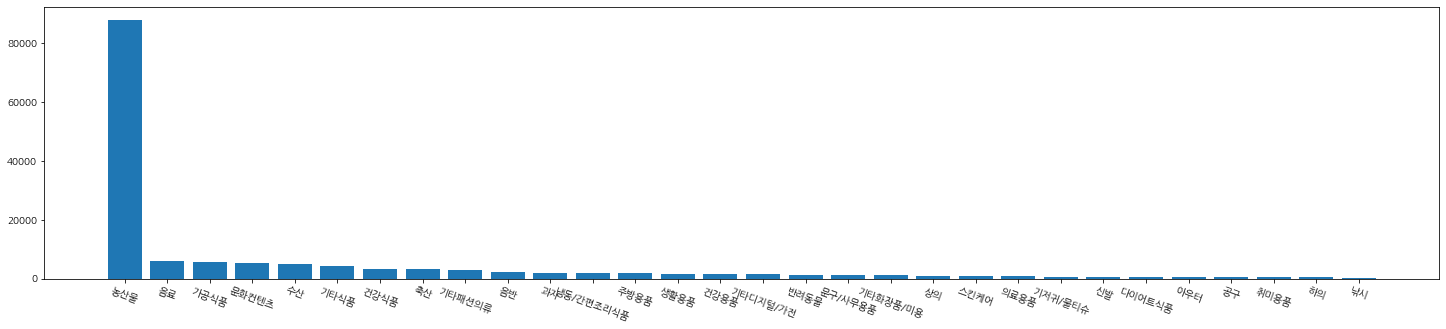

In [23]:
plt.bar(df_cnt['product'][0:30], df_cnt['cnt'][0:30], label='cnt')
plt.xticks(rotation =-20);
plt.gcf().set_size_inches(25, 5)
plt.show()